In [1]:
import pandas as pd
import numpy as np
from scipy.stats import levene
from scipy.stats import bartlett
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import shapiro, anderson, kstest,jarque_bera, normaltest , levene,bartlett


In [2]:
df = pd.read_csv("./data/전처리완료/코스닥_train_std.csv", index_col=0)
test = pd.read_csv("./data/전처리완료/코스닥_test_std.csv", index_col=0)
# pd.reset_option("display.max.rows", None)
df["거래소코드"] = df["거래소코드"].astype("object")
df["회계년도"] = df["회계년도"].astype("object")


df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 4386 entries, 0 to 4385
Data columns (total 45 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   차입금의존도        4386 non-null   float64
 1   부채비율          4386 non-null   float64
 2   순운전자본비율       4386 non-null   float64
 3   총자본정상영업이익률    4386 non-null   float64
 4   자기자본순이익률      4386 non-null   float64
 5   총자본순이익률       4386 non-null   float64
 6   매출액총이익률       4386 non-null   float64
 7   금융비용부담률       4386 non-null   float64
 8   자본금회전률        4386 non-null   float64
 9   유형자산회전율       4386 non-null   float64
 10  자기자본회전률       4386 non-null   float64
 11  타인자본회전률       4386 non-null   float64
 12  총자본회전률        4386 non-null   float64
 13  합계_기말인원(명)    4386 non-null   float64
 14  대주주지분율        4386 non-null   float64
 15  유형자산증가율       4386 non-null   float64
 16  매출액증가율        4386 non-null   float64
 17  자기자본증가율       4386 non-null   float64
 18  총자본증가율        4386 non-null   flo

In [3]:
df.columns

Index(['차입금의존도', '부채비율', '순운전자본비율', '총자본정상영업이익률', '자기자본순이익률', '총자본순이익률',
       '매출액총이익률', '금융비용부담률', '자본금회전률', '유형자산회전율', '자기자본회전률', '타인자본회전률',
       '총자본회전률', '합계_기말인원(명)', '대주주지분율', '유형자산증가율', '매출액증가율', '자기자본증가율',
       '총자본증가율', '정상영업이익증가율', '누적수익성비율', '현금흐름 대 자산', '현금흐름 대 매출액', 'TMD',
       '시총/총자산', 'EBIT/총자산', '당기전기영업손익', '당기전기매출액', '당기전기영업손익/매출액', 'FINDEP',
       'PBR변화율', 'EBITDA마진율', 'CND', 'WW지수', 'WWC변수', 'MK지수', 'SA지수',
       '매출액증가율차분', 'target_1', 'target_2', 'target_3', '회사명', '거래소코드', '회계년도',
       '산업군'],
      dtype='object')

In [4]:
# 정상
pd.set_option('display.max_columns',None)
df[df['target_3']==0].describe()

,차입금의존도,부채비율,순운전자본비율,총자본정상영업이익률,자기자본순이익률,총자본순이익률,매출액총이익률,금융비용부담률,자본금회전률,유형자산회전율,자기자본회전률,타인자본회전률,총자본회전률,합계_기말인원(명),대주주지분율,유형자산증가율,매출액증가율,자기자본증가율,총자본증가율,정상영업이익증가율,누적수익성비율,현금흐름 대 자산,현금흐름 대 매출액,TMD,시총/총자산,EBIT/총자산,당기전기영업손익,당기전기매출액,당기전기영업손익/매출액,FINDEP,PBR변화율,EBITDA마진율,CND,WW지수,WWC변수,MK지수,SA지수,매출액증가율차분,target_1,target_2,target_3
count,4221.000000,4221.000000,4221.000000,4221.000000,4221.000000,4221.000000,4221.000000,4221.000000,4221.000000,4221.000000,4221.000000,4221.000000,4221.000000,4221.000000,4221.000000,4221.000000,4221.000000,4221.000000,4221.000000,4221.000000,4221.000000,4221.000000,4221.000000,4221.000000,4221.000000,4221.000000,4221.000000,4221.000000,4221.000000,4221.000000,4221.000000,4221.000000,4221.000000,4221.000000,4221.000000,4221.000000,4221.000000,4221.000000,4221.000000,4221.000000,4221.0
mean,-0.045078,-0.027210,0.049262,0.077520,0.052408,0.099268,0.037159,-0.067535,0.023322,-0.001444,-0.005617,0.035207,0.027329,0.007506,0.035739,-0.011534,0.022612,0.033575,0.030596,0.027667,0.087068,0.056220,0.070865,-0.054305,-0.011891,0.089505,0.046995,0.008917,0.082061,-0.013857,-0.017303,0.083791,-0.080154,-0.052252,-0.020673,-0.055030,0.013756,0.023081,0.001185,0.008529,0.0
std,0.787844,0.071124,0.726633,0.877901,0.168662,0.664324,0.926369,0.486071,1.004838,0.999632,0.887132,0.993753,0.988565,0.886274,0.977336,0.577502,0.924848,0.521503,0.908899,0.942968,0.636993,0.841047,0.576310,0.594960,0.837902,0.491544,0.944100,0.981925,0.804137,0.912759,0.068284,0.681559,0.294401,0.958610,1.013883,0.953519,1.001836,0.932282,0.034401,0.091968,0.0
min,-1.120272,-0.109086,-1.836722,-3.989805,-1.234438,-3.701702,-2.135311,-1.631185,-0.937375,-0.435318,-1.232237,-1.408844,-1.794388,-0.957982,-1.929388,-1.073465,-2.331201,-1.557353,-2.165591,-9.810319,-3.634030,-3.364818,-6.231693,-0.588247,-0.866248,-2.899913,-2.116857,-0.802581,-10.168822,-5.427162,-0.122338,-7.523397,-0.320512,-2.814258,-8.591438,-2.815275,-1.906098,-2.492096,0.000000,0.000000,0.0
25%,-0.749452,-0.080755,-0.483751,-0.328886,0.013951,-0.127324,-0.618210,-0.305458,-0.617276,-0.344908,-0.652002,-0.702607,-0.705032,-0.556546,-0.724107,-0.211986,-0.473414,-0.193872,-0.448304,-0.152940,-0.194838,-0.449888,-0.182233,-0.443747,-0.526184,-0.101116,-0.449554,-0.554143,-0.164365,-0.335805,-0.059352,-0.210649,-0.252366,-0.732117,-0.161838,-0.741186,-0.747643,-0.481091,0.000000,0.000000,0.0
50%,-0.112697,-0.046005,0.059349,0.071221,0.085118,0.183853,-0.172360,-0.149776,-0.282893,-0.271450,-0.265179,-0.225587,-0.137660,-0.258707,-0.003137,-0.145276,-0.099286,-0.037001,-0.120146,0.035166,0.155431,0.086127,0.099338,-0.257208,-0.267086,0.137781,-0.191033,-0.307351,0.111860,-0.025521,-0.032382,0.044035,-0.165082,-0.123039,0.443738,-0.138441,-0.167529,-0.074117,0.000000,0.000000,0.0
75%,0.570287,0.006840,0.571454,0.579501,0.144157,0.488374,0.520981,0.074016,0.308099,-0.113860,0.419201,0.517820,0.565882,0.263591,0.734645,0.012147,0.309385,0.167332,0.309933,0.245249,0.497643,0.585304,0.391371,0.098595,0.199908,0.374604,0.265111,0.162315,0.466382,0.308220,0.004868,0.424096,-0.022313,0.686030,0.531073,0.695780,0.640558,0.350889,0.000000,0.000000,0.0
max,1.975026,0.430842,1.906947,2.838089,0.500425,1.805470,3.308297,4.846633,6.258758,10.131972,4.659382,3.894129,3.970119,5.706709,2.386734,7.227349,7.021248,4.416921,7.161653,5.731039,1.230985,2.500698,1.980478,3.963820,6.225031,1.369713,7.978736,8.073861,2.328085,4.783717,0.400553,2.238940,3.252356,2.402973,0.531074,2.338716,3.415858,6.823015,1.000000,1.000000,0.0


In [5]:
# 부실
df[df['target_3']==1].describe()

,차입금의존도,부채비율,순운전자본비율,총자본정상영업이익률,자기자본순이익률,총자본순이익률,매출액총이익률,금융비용부담률,자본금회전률,유형자산회전율,자기자본회전률,타인자본회전률,총자본회전률,합계_기말인원(명),대주주지분율,유형자산증가율,매출액증가율,자기자본증가율,총자본증가율,정상영업이익증가율,누적수익성비율,현금흐름 대 자산,현금흐름 대 매출액,TMD,시총/총자산,EBIT/총자산,당기전기영업손익,당기전기매출액,당기전기영업손익/매출액,FINDEP,PBR변화율,EBITDA마진율,CND,WW지수,WWC변수,MK지수,SA지수,매출액증가율차분,target_1,target_2,target_3
count,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.0,165.0,165.0
mean,1.153186,0.696085,-1.260208,-1.983106,-1.340679,-2.539444,-0.950599,1.727677,-0.596613,0.036953,0.143691,-0.900661,-0.699118,-0.192024,-0.914281,0.295049,-0.578453,-0.858906,-0.782696,-0.707763,-2.227364,-1.438212,-1.812868,1.389223,0.304182,-2.289700,-1.202208,-0.228119,-2.099264,0.354498,0.442635,-2.143526,2.050477,1.336696,0.528844,1.407764,-0.351913,-0.590462,1.0,1.0,1.0
std,3.063011,5.109520,3.390781,1.673570,4.912519,2.940424,1.928035,4.188550,0.624915,1.014741,2.543892,0.696173,1.042282,2.548245,1.136422,4.251017,2.093947,4.355978,2.201495,1.827536,3.334141,2.525848,3.842103,3.951941,2.929410,3.878896,1.515793,1.370975,2.344727,2.274800,5.139951,3.160305,4.485335,1.109171,0.020213,1.129968,0.887783,2.003673,0.0,0.0,0.0
min,-1.120272,-0.115436,-41.603441,-10.043550,-56.859778,-24.038053,-13.901487,-3.404496,-0.951660,-0.445363,-1.321504,-1.569916,-1.953252,-1.014096,-2.311535,-1.367837,-3.464720,-26.528660,-4.291309,-13.557598,-29.065953,-21.250862,-34.301410,-0.596565,-0.950439,-29.708359,-13.483531,-0.816817,-15.509715,-18.696306,-14.186945,-21.618687,-0.322386,-2.001107,0.338369,-2.040755,-1.918397,-3.535136,1.0,1.0,1.0
25%,-0.022229,-0.065974,-1.686355,-2.779056,-1.120441,-3.586883,-1.494137,0.200508,-0.915153,-0.389485,-0.897486,-1.266358,-1.340490,-0.884601,-1.703721,-0.576747,-1.620527,-1.711485,-2.018732,-0.927962,-2.403913,-2.178272,-2.020439,-0.336155,-0.706218,-2.600689,-1.253731,-0.734557,-2.986935,0.050068,-0.087418,-2.478470,0.047197,0.640595,0.531073,0.738163,-0.936115,-1.669560,1.0,1.0,1.0
50%,0.935141,0.053788,-0.992558,-1.754677,-0.554855,-1.795534,-0.822026,0.750259,-0.819388,-0.316027,-0.488346,-1.080506,-0.954676,-0.750789,-1.182553,-0.255353,-0.918690,-0.816898,-1.136786,-0.055623,-1.387641,-1.154605,-0.714844,0.117868,-0.342183,-1.148245,-0.915288,-0.661302,-1.538208,0.266592,-0.011956,-1.260231,0.685354,1.317339,0.531074,1.370438,-0.531881,-0.872251,1.0,1.0,1.0
75%,1.694178,0.264132,-0.240724,-0.843683,-0.143091,-0.827057,-0.160228,2.107608,-0.624684,-0.122022,0.173717,-0.770753,-0.387304,-0.383886,-0.445418,-0.079981,-0.161636,-0.005479,-0.156606,0.169404,-0.624583,-0.422475,-0.136578,1.541432,0.288407,-0.485131,-0.655325,-0.354659,-0.643873,0.585161,0.104966,-0.512835,1.766231,1.977082,0.531074,2.016480,0.077195,-0.228198,1.0,1.0,1.0
max,36.130672,64.408516,2.055665,2.127800,1.059463,2.585909,3.734129,44.574654,2.936611,6.840171,25.585044,3.231257,5.150254,22.260522,4.087319,39.117326,13.573500,31.462616,15.145707,2.452878,0.984500,12.532540,1.990151,32.813576,32.566340,2.635272,1.167106,9.975753,2.036855,15.623386,63.474041,1.682629,32.923927,6.363879,0.531077,6.246115,2.735968,13.409174,1.0,1.0,1.0


In [6]:
df_y = df[["target_1", "target_2", "target_3"]]
df_obj = df.select_dtypes("object")
col_int = df.select_dtypes("float").columns.to_list()

In [7]:
# 정규성 검정을 하나의 함수로
def normal_test(test_name,x):
    normal = []
    notnormal = []
    if test_name == 'shapiro':
        for var in x.columns :
            stat, p  = shapiro(x[var].values)
            alpha = 0.05
            if p > alpha :
                normal.append(var)
            else :
                notnormal.append(var)
                
    elif test_name == 'anderson':
        for var in x.columns :
            result  = anderson(x[var].values,dist='norm')
            normality = 0
            for i in range(len(result.critical_values)):
                # sl, cv = result.significance_level[i], result.critical_values[i]
                if result.statistic < result.critical_values[i]:
                    normality +=1
                else :
                    normality +=0
            if normality > 2.5 :
                normal.append(var)
            else :
                notnormal.append(var)
                
    elif test_name == 'kstest':
        for var in x.columns :
            stat,p  = kstest(x[var].values, "norm")
            alpha = 0.05
            if p > alpha :
                normal.append(var)
            else :
                notnormal.append(var)
    
    elif test_name == 'jarque_bera':
        for var in x.columns :
            stat,p  = jarque_bera(x[var].values)
            alpha = 0.05
            if p > alpha :
                normal.append(var)
            else :
                notnormal.append(var)
                
    elif test_name == 'normaltest':
        for var in x.columns :
            stat, p  = normaltest(x[var].values)
            alpha = 0.05
            if p > alpha :
                normal.append(var)
            else :
                notnormal.append(var)
    else:
        pass
    return pd.DataFrame(normal, columns = ['normal']),pd.DataFrame(notnormal, columns = ['notnormal'])

In [8]:
normal_test("kstest",df[col_int])

(Empty DataFrame
 Columns: [normal]
 Index: [],
        notnormal
 0         차입금의존도
 1           부채비율
 2        순운전자본비율
 3     총자본정상영업이익률
 4       자기자본순이익률
 5        총자본순이익률
 6        매출액총이익률
 7        금융비용부담률
 8         자본금회전률
 9        유형자산회전율
 10       자기자본회전률
 11       타인자본회전률
 12        총자본회전률
 13    합계_기말인원(명)
 14        대주주지분율
 15       유형자산증가율
 16        매출액증가율
 17       자기자본증가율
 18        총자본증가율
 19     정상영업이익증가율
 20       누적수익성비율
 21     현금흐름 대 자산
 22    현금흐름 대 매출액
 23           TMD
 24        시총/총자산
 25      EBIT/총자산
 26      당기전기영업손익
 27       당기전기매출액
 28  당기전기영업손익/매출액
 29        FINDEP
 30        PBR변화율
 31     EBITDA마진율
 32           CND
 33          WW지수
 34         WWC변수
 35          MK지수
 36          SA지수
 37      매출액증가율차분)

In [9]:
normal_test("shapiro",df[col_int])

(Empty DataFrame
 Columns: [normal]
 Index: [],
        notnormal
 0         차입금의존도
 1           부채비율
 2        순운전자본비율
 3     총자본정상영업이익률
 4       자기자본순이익률
 5        총자본순이익률
 6        매출액총이익률
 7        금융비용부담률
 8         자본금회전률
 9        유형자산회전율
 10       자기자본회전률
 11       타인자본회전률
 12        총자본회전률
 13    합계_기말인원(명)
 14        대주주지분율
 15       유형자산증가율
 16        매출액증가율
 17       자기자본증가율
 18        총자본증가율
 19     정상영업이익증가율
 20       누적수익성비율
 21     현금흐름 대 자산
 22    현금흐름 대 매출액
 23           TMD
 24        시총/총자산
 25      EBIT/총자산
 26      당기전기영업손익
 27       당기전기매출액
 28  당기전기영업손익/매출액
 29        FINDEP
 30        PBR변화율
 31     EBITDA마진율
 32           CND
 33          WW지수
 34         WWC변수
 35          MK지수
 36          SA지수
 37      매출액증가율차분)

In [10]:
def homoscedasticity_test(df, col,tool):
        dict = {"변수" : [], "p_val" : [], "T" : [] }           
        if tool == "levene":
                
                for i in col:
                        T, p_val =levene(df[df['target_3']==1][i], df[df['target_3']==0][i]) 
                        dict["변수"].append(i)
                        dict["p_val"].append(p_val)
                        dict["T"].append(T)

                        list = pd.DataFrame(dict)

        if tool == "bartlett":
                for i in col:
                        T, p_val =bartlett(df[df['target_3']==1][i], df[df['target_3']==0][i]) 
                        dict["변수"].append(i)
                        dict["p_val"].append(p_val)
                        dict["T"].append(T)

                        list = pd.DataFrame(dict)
        return list


In [11]:
bartlett_결과 = homoscedasticity_test(df,col_int,"bartlett")
bartlett_등분산 = bartlett_결과[bartlett_결과["p_val"]>0.05]
bartlett등분산변수 = bartlett_등분산.loc[:,"변수"].to_list()
bartlett등분산변수

['유형자산회전율', '총자본회전률']

In [12]:
levene_결과 = homoscedasticity_test(df,col_int,"levene")
levene_등분산 = levene_결과[levene_결과["p_val"]>0.05]


levene등분산변수 = levene_등분산.loc[:,"변수"].to_list()


등분산변수target = levene등분산변수+ ["target_3"]

In [13]:
levene_비등분산 = levene_결과[levene_결과["p_val"]<0.05]
levene_비등분산target = levene_비등분산.loc[:,"변수"].to_list() + ["target_3"]

In [14]:
import scipy.stats as stats

def t_test(df,col,tool,alpha=0.05):
    dict_1 = {'변수':[],'p_val':[],'t-val':[]}
    dict_2 = {'변수':[],'p_val':[],'t-val':[]}
    if tool == 'student':
        for i in col:
            t_statistic, p_value = stats.ttest_ind(df[df['target_3']==1][i], df[df['target_3']==0][i])
            dict_1["변수"].append(i)
            dict_1["p_val"].append(p_value)
            dict_1["t-val"].append(t_statistic)

            list = pd.DataFrame(dict_1)
        return list

    if tool == 'welch':
        for i in col:
            t_statistic, p_value = stats.ttest_ind(df[df['target_3']==1][i], df[df['target_3']==0][i],equal_var=False)
            dict_2["변수"].append(i)
            dict_2["p_val"].append(p_value)
            dict_2["t-val"].append(t_statistic)

            list = pd.DataFrame(dict_2)
        return list

In [15]:
이분산 = t_test(df[levene_비등분산target],levene_비등분산target,"welch",alpha=0.05)
이분산t = 이분산[이분산["p_val"]<0.05]
이분산t


C:\Users\leeju\AppData\Local\Temp\ipykernel_12992\2458501125.py:18: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  t_statistic, p_value = stats.ttest_ind(df[df['target_3']==1][i], df[df['target_3']==0][i],equal_var=False)


,변수,p_val,t-val
0,차입금의존도,1.337586e-06,5.018631
2,순운전자본비율,1.773167e-06,-4.956195
3,총자본정상영업이익률,7.901606e-35,-15.731640
4,자기자본순이익률,3.617215e-04,-3.642553
5,총자본순이익률,6.953406e-23,-11.515722
6,매출액총이익률,6.772063e-10,-6.551294
7,금융비용부담률,1.403380e-07,5.504019
8,자본금회전률,9.555396e-26,-12.143947
10,타인자본회전률,5.865122e-39,-16.618738
12,매출액증가율,3.224683e-04,-3.673231


In [16]:
등분산 = t_test(df[등분산변수target],등분산변수target,"student",alpha=0.05)
등분산t = 등분산[등분산["p_val"]<0.05]
등분산t

C:\Users\leeju\AppData\Local\Temp\ipykernel_12992\2458501125.py:8: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  t_statistic, p_value = stats.ttest_ind(df[df['target_3']==1][i], df[df['target_3']==0][i])


,변수,p_val,t-val
1,총자본회전률,3.724415e-20,-9.240788
2,합계_기말인원(명),1.191928e-02,-2.515576
3,대주주지분율,1.566066e-33,-12.169231
4,당기전기영업손익,2.189400e-57,-16.202330
5,당기전기매출액,2.811459e-03,-2.989326
6,WW지수,5.383778e-71,18.143647
7,MK지수,7.471532e-79,19.187090
8,target_3,0.000000e+00,inf


In [17]:
등분산_col = 등분산t.loc[:, "변수"].to_list()
이분산_col = 이분산t.loc[:, "변수"].to_list()
의미있는_col = 이분산_col + 등분산_col

In [18]:
df_1 = df[의미있는_col]
df_1.drop(columns="target_3", axis=1, inplace=True)

C:\Users\leeju\AppData\Local\Temp\ipykernel_12992\687291390.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1.drop(columns="target_3", axis=1, inplace=True)


In [19]:
# VIF 출력을 위한 데이터 프레임 형성
pd.set_option("display.max.rows", None)
vif = pd.DataFrame()

# VIF 값과 각 Feature 이름에 대해 설정
vif["VIF Factor"] = [variance_inflation_factor(df_1.values, i) for i in range(df_1.shape[1])]
vif["features"] = df_1.columns 

# VIF 값이 높은 순으로 정렬
vif = vif.sort_values(by="VIF Factor", ascending=False)
vif = vif.reset_index().drop(columns='index')
vif

,VIF Factor,features
0,2139.887318,MK지수
1,2095.461386,WW지수
2,8.846532,차입금의존도
3,8.315699,총자본순이익률
4,8.092740,매출액증가율차분
5,7.852810,매출액증가율
6,7.589066,EBIT/총자산
7,7.189054,총자본정상영업이익률
8,4.479532,순운전자본비율
9,4.445479,EBITDA마진율


In [ ]:
drop_col = ["MK지수"]

In [20]:
df_1.drop(columns=drop_col, axis=1 , inplace=True)

# VIF 출력을 위한 데이터 프레임 형성
pd.set_option("display.max.rows", None)
vif = pd.DataFrame()

# VIF 값과 각 Feature 이름에 대해 설정
vif["VIF Factor"] = [variance_inflation_factor(df_1.values, i) for i in range(df_1.shape[1])]
vif["features"] = df_1.columns 

# VIF 값이 높은 순으로 정렬
vif = vif.sort_values(by="VIF Factor", ascending=False)
vif = vif.reset_index().drop(columns='index')
vif

C:\Users\leeju\AppData\Local\Temp\ipykernel_12992\203477508.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1.drop(columns="MK지수", axis=1 , inplace=True)


,VIF Factor,features
0,8.311882,총자본순이익률
1,8.092732,매출액증가율차분
2,7.850079,매출액증가율
3,7.583539,EBIT/총자산
4,7.179109,총자본정상영업이익률
5,4.423625,EBITDA마진율
6,4.142661,WW지수
7,4.139381,당기전기영업손익/매출액
8,3.948754,차입금의존도
9,3.822393,순운전자본비율


In [22]:
통계적유의_col = vif["features"].to_list() 
df_vif = pd.concat([df_obj ,df_1[통계적유의_col], df_y], axis=1)
df_vif.to_csv("./data/통계검증완료/코스닥_standard_train.csv", encoding="utf-8-sig")
test[df_vif.columns].to_csv("./data/통계검증완료/코스닥_standard_test.csv", encoding="utf-8-sig")

In [23]:
비교 =  test.columns
전체 = df_vif.columns


def find_difference(list1, list2):
    difference = []
    for item in list1:
        if item not in list2:
            difference.append(item)
    return difference

find_difference(전체,비교)


[]

In [24]:
df_vif.columns

Index(['회사명', '거래소코드', '회계년도', '산업군', '총자본순이익률', '매출액증가율차분', '매출액증가율',
       'EBIT/총자산', '총자본정상영업이익률', 'EBITDA마진율', 'WW지수', '당기전기영업손익/매출액', '차입금의존도',
       '순운전자본비율', '현금흐름 대 매출액', '현금흐름 대 자산', '당기전기매출액', '누적수익성비율', 'CND',
       '당기전기영업손익', '타인자본회전률', '총자본회전률', '금융비용부담률', '자본금회전률', 'WWC변수', 'FINDEP',
       '총자본증가율', 'TMD', '매출액총이익률', '자기자본증가율', '합계_기말인원(명)', 'SA지수',
       '정상영업이익증가율', '대주주지분율', '자기자본순이익률', 'target_1', 'target_2', 'target_3'],
      dtype='object')

C:\Users\leeju\AppData\Local\Temp\ipykernel_12992\2489820295.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(corr, dtype=np.bool))


<Axes: title={'center': 'Correlation of Features'}>

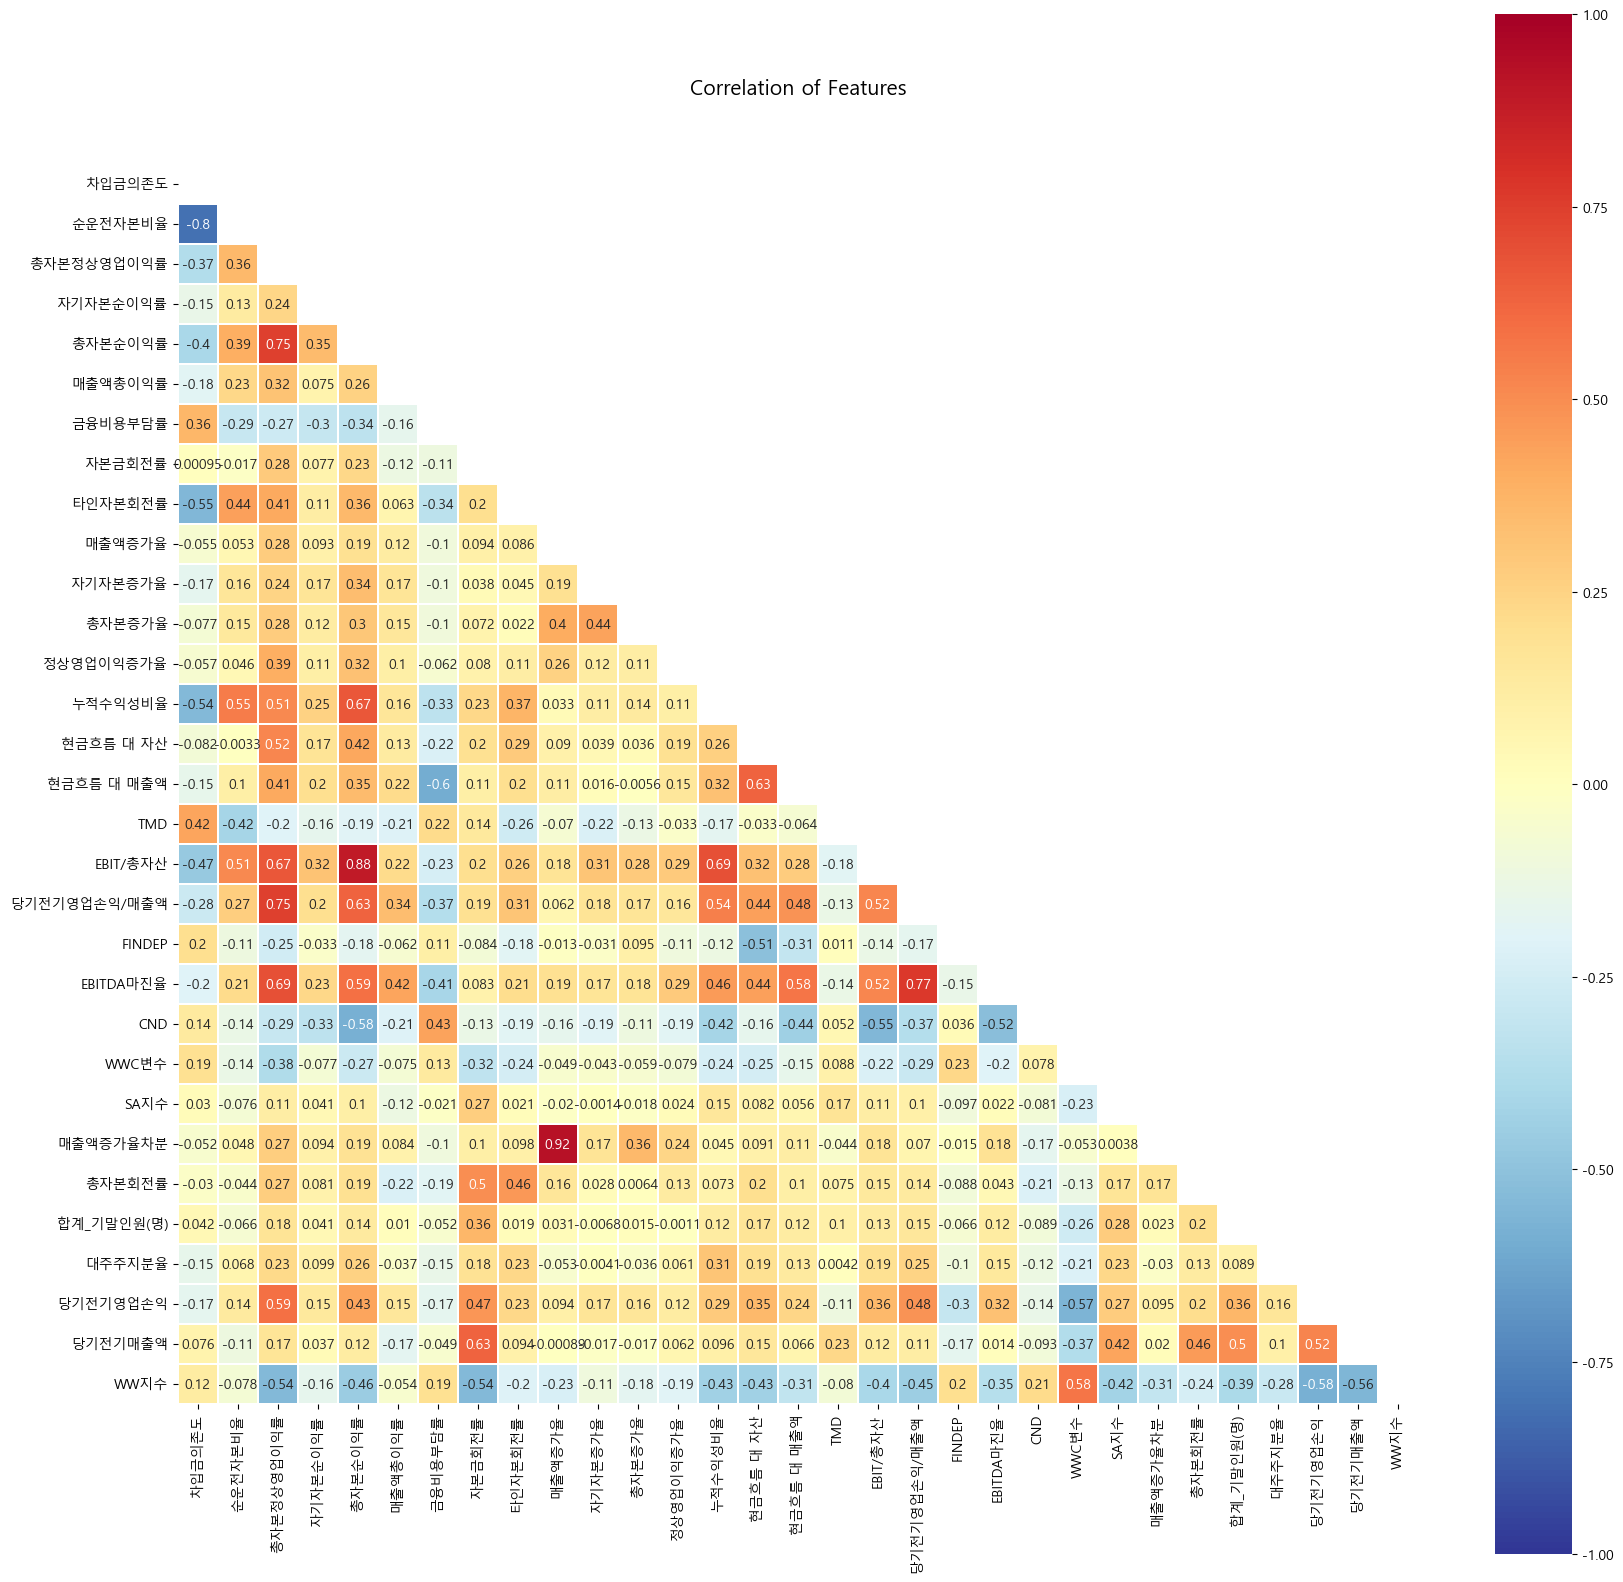

In [25]:
colormap = plt.cm.hot

corr = df_1.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
plt.figure(figsize=(20, 20))
plt.rcParams['axes.unicode_minus'] = False
plt.rc('font', family="Malgun Gothic")
plt.title("Correlation of Features", y=1.05, size=15)
sns.heatmap(corr,  linewidths=0.1, vmax=1.0, vmin=-1.0, square=True,mask=mask,
            cmap='RdYlBu_r', linecolor="white", annot=True, annot_kws={'size': 10})